In [1]:
from Bio import SeqIO
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import itertools
import pickle
import random
import seaborn as sns

In [2]:
data = {}
with open('./Chrom_level_Viora.rg.FINAL.fasta', 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        data[record.id] = str(record.seq).upper()

In [3]:
def count_kmers(read, k):
    """Count kmer occurrences in a given read.

    Parameters
    ----------
    read : string
        A single DNA sequence.
    k : int
        The value of k for which to count kmers.

    Returns
    -------
    counts : dictionary, {'string': int}
        A dictionary of counts keyed by their individual kmers (strings
        of length k).

    Examples
    --------
    >>> count_kmers("GATGAT", 3)
    {'ATG': 1, 'GAT': 2, 'TGA': 1}
    """
    # Start with an empty dictionary
    counts = {}
    nucleotides = ['A', 'T', 'G', 'C']
    # Add the kmer to the dictionary if it's not there
    for i in itertools.product(nucleotides, repeat=k):
        counts["".join(i)] = 0
    # Calculate how many kmers of length k there are
    num_kmers = len(read) - k + 1
    # Loop over the kmer start positions
    for i in range(num_kmers):
        # Slice the string to get the kmer
        kmer = read[i:i+k]
        if kmer not in counts:
            continue
        # Increment the count for this kmer
        counts[kmer] += 1
    # Return the final counts
    return counts

In [5]:
K = 13
kmer_datas = {}
for k, v in tqdm(data.items()):
    kmer_data = count_kmers(v, K)
    kmer_datas[k] = kmer_data

  0%|          | 0/12 [00:00<?, ?it/s]

In [6]:
import Bio.SeqIO as SeqIO
import math
reg_data = {}
unmasked_data_length = {}
with open("./Chrom_level_Viora.rg.FINAL.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        unmasked_data_length[record.id] = len(record.seq)

for k1, v1 in kmer_datas.items():
    temp = {}
    for k2, v2 in v1.items():
        temp[k2] = math.log10(v2 / unmasked_data_length[k1] + 1)
    reg_data[k1] = temp

In [7]:
#df = pd.DataFrame(reg_data)
df = pd.DataFrame(kmer_datas)

In [8]:
df.T

,AAAAAAAAAAAAA,AAAAAAAAAAAAT,AAAAAAAAAAAAG,AAAAAAAAAAAAC,AAAAAAAAAAATA,AAAAAAAAAAATT,AAAAAAAAAAATG,AAAAAAAAAAATC,AAAAAAAAAAAGA,AAAAAAAAAAAGT,...,CCCCCCCCCCCTG,CCCCCCCCCCCTC,CCCCCCCCCCCGA,CCCCCCCCCCCGT,CCCCCCCCCCCGG,CCCCCCCCCCCGC,CCCCCCCCCCCCA,CCCCCCCCCCCCT,CCCCCCCCCCCCG,CCCCCCCCCCCCC
HiC_scaffold_1,2274,329,376,329,191,219,92,159,383,133,...,8,140,33,15,16,25,178,167,85,2198
HiC_scaffold_2,2020,328,344,347,147,230,79,164,346,105,...,12,125,28,15,11,19,200,178,69,2776
HiC_scaffold_3,1936,317,337,351,162,207,92,163,314,100,...,16,146,33,12,15,13,166,211,71,2707
HiC_scaffold_4,2215,378,395,377,186,274,83,170,373,124,...,13,124,42,19,18,16,172,182,89,2735
HiC_scaffold_5,2250,326,389,359,172,251,79,152,351,124,...,9,139,34,12,14,9,192,199,66,2673
HiC_scaffold_6,3617,382,353,310,205,224,89,166,321,119,...,11,112,30,7,8,16,111,149,56,1936
HiC_scaffold_7,2099,343,330,322,175,204,84,161,321,97,...,24,118,39,11,20,10,177,176,77,2511
HiC_scaffold_8,2875,436,468,404,197,318,136,196,456,131,...,18,188,46,18,40,22,216,248,124,3806
HiC_scaffold_9,2427,349,418,367,185,252,75,159,362,128,...,26,151,53,20,22,12,203,220,98,2935
HiC_scaffold_10,2785,395,400,384,199,226,103,172,405,117,...,15,155,37,9,16,25,177,225,83,2688


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

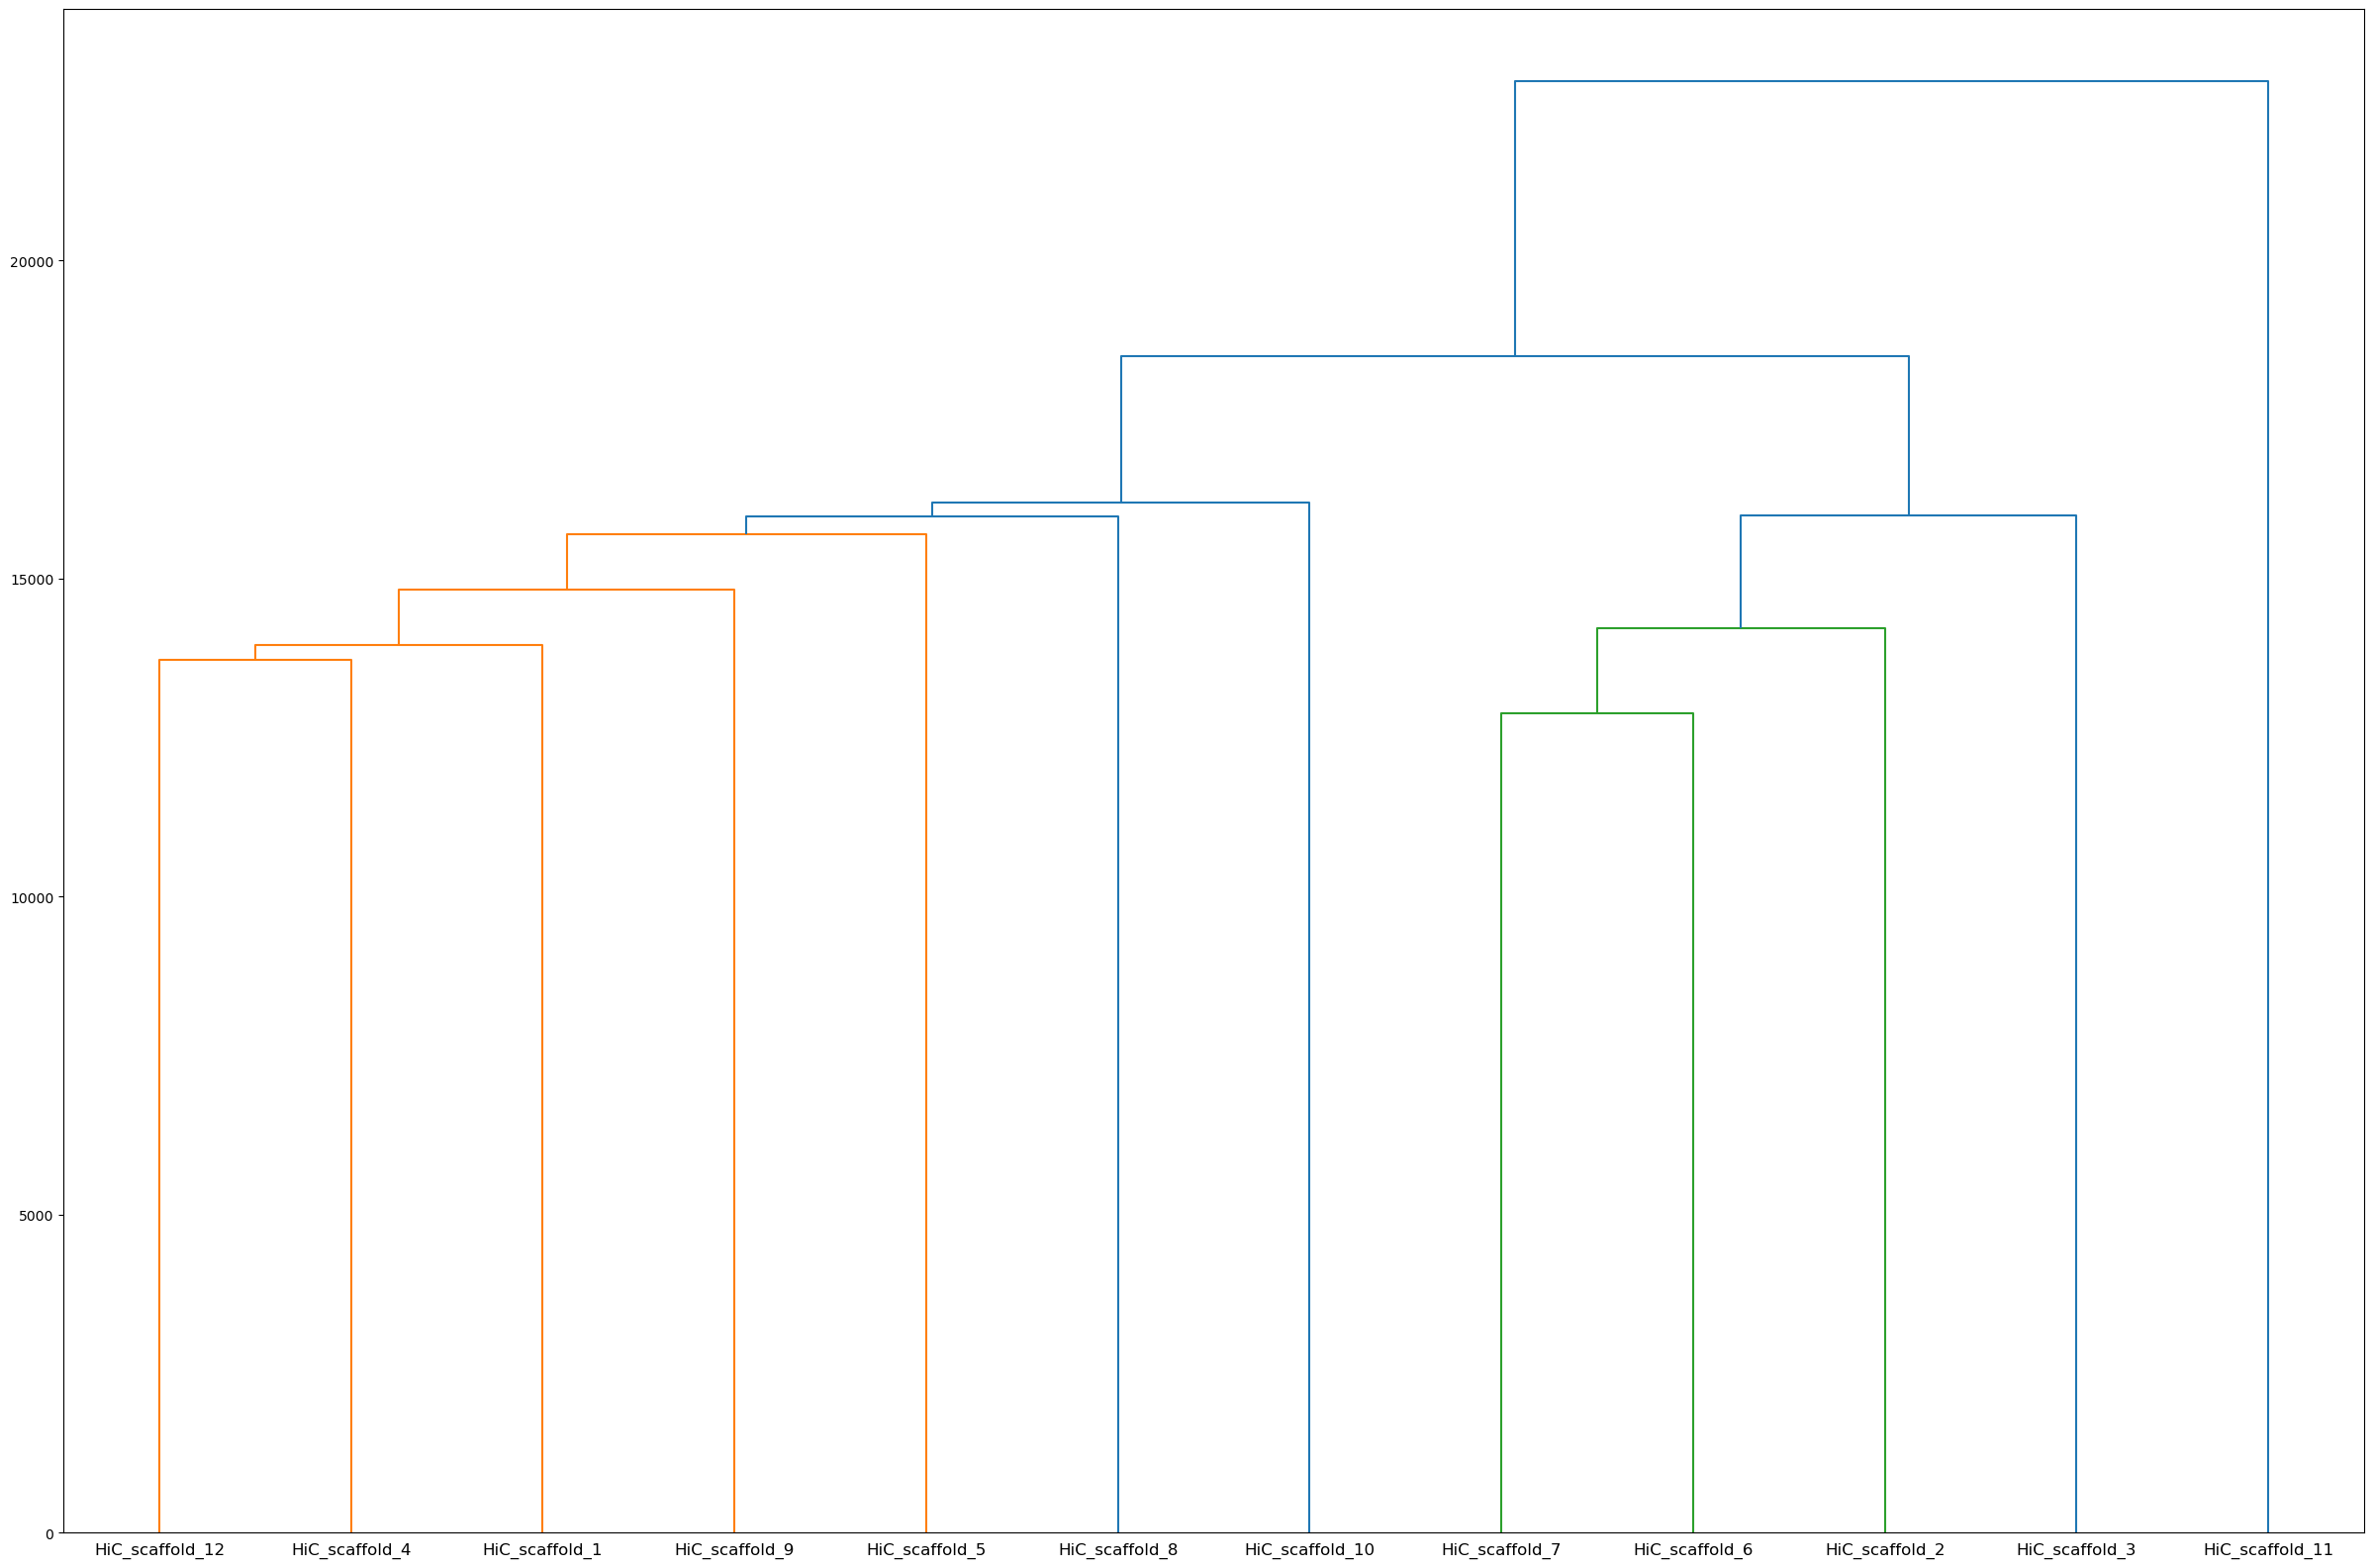

In [10]:
plt.figure(figsize=(30, 20))
linked = linkage(df.T, method="ward")
dend = dendrogram(linked, orientation='top', distance_sort='descending', \
                  labels=list(df.T.index), show_leaf_counts=True)
plt.savefig("./dendrogram.png")

<AxesSubplot:xlabel='component 0', ylabel='component 1'>

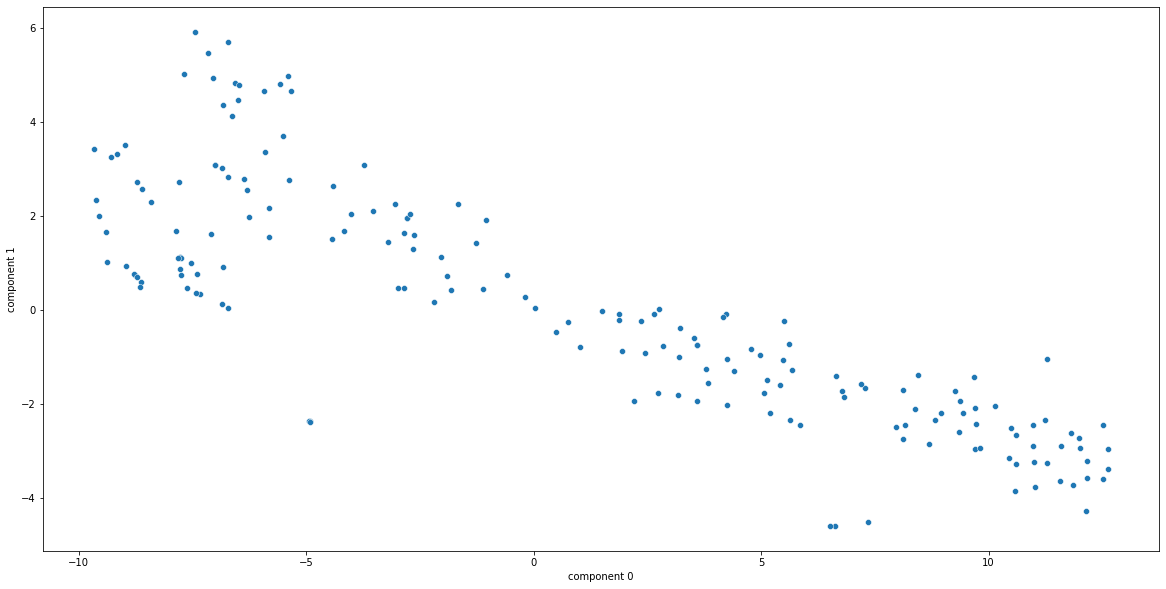

In [172]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne_np = TSNE(n_components = 2, learning_rate=1, init='random', random_state = 11, \
               perplexity=40, early_exaggeration=14).fit_transform(df.T)


tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
axes, fig = plt.subplots(figsize=(20, 10))
# sns.scatterplot(x=tsne_df['component 0'], y=tsne_df['component 1'], hue="chr", data=tsne_df)
sns.scatterplot(x=tsne_df['component 0'], y=tsne_df['component 1'], data=tsne_df)

In [173]:
from sklearn.mixture import GaussianMixture

In [174]:
gmm_np = GaussianMixture(n_components=2, random_state=39).fit_predict(df.T)
gmm_l = list(gmm_np)
gmm_dict = {}
for n, v in zip(data.keys(), gmm_l):
    gmm_dict[n] = v
gmm_df = pd.Series(gmm_dict)

<AxesSubplot:ylabel='Frequency'>

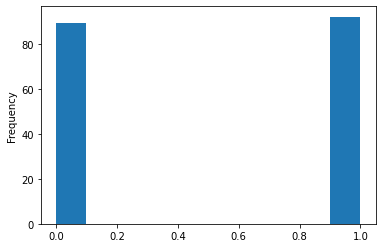

In [175]:
gmm_df.plot(kind="hist")

NameError: name 'plt' is not defined

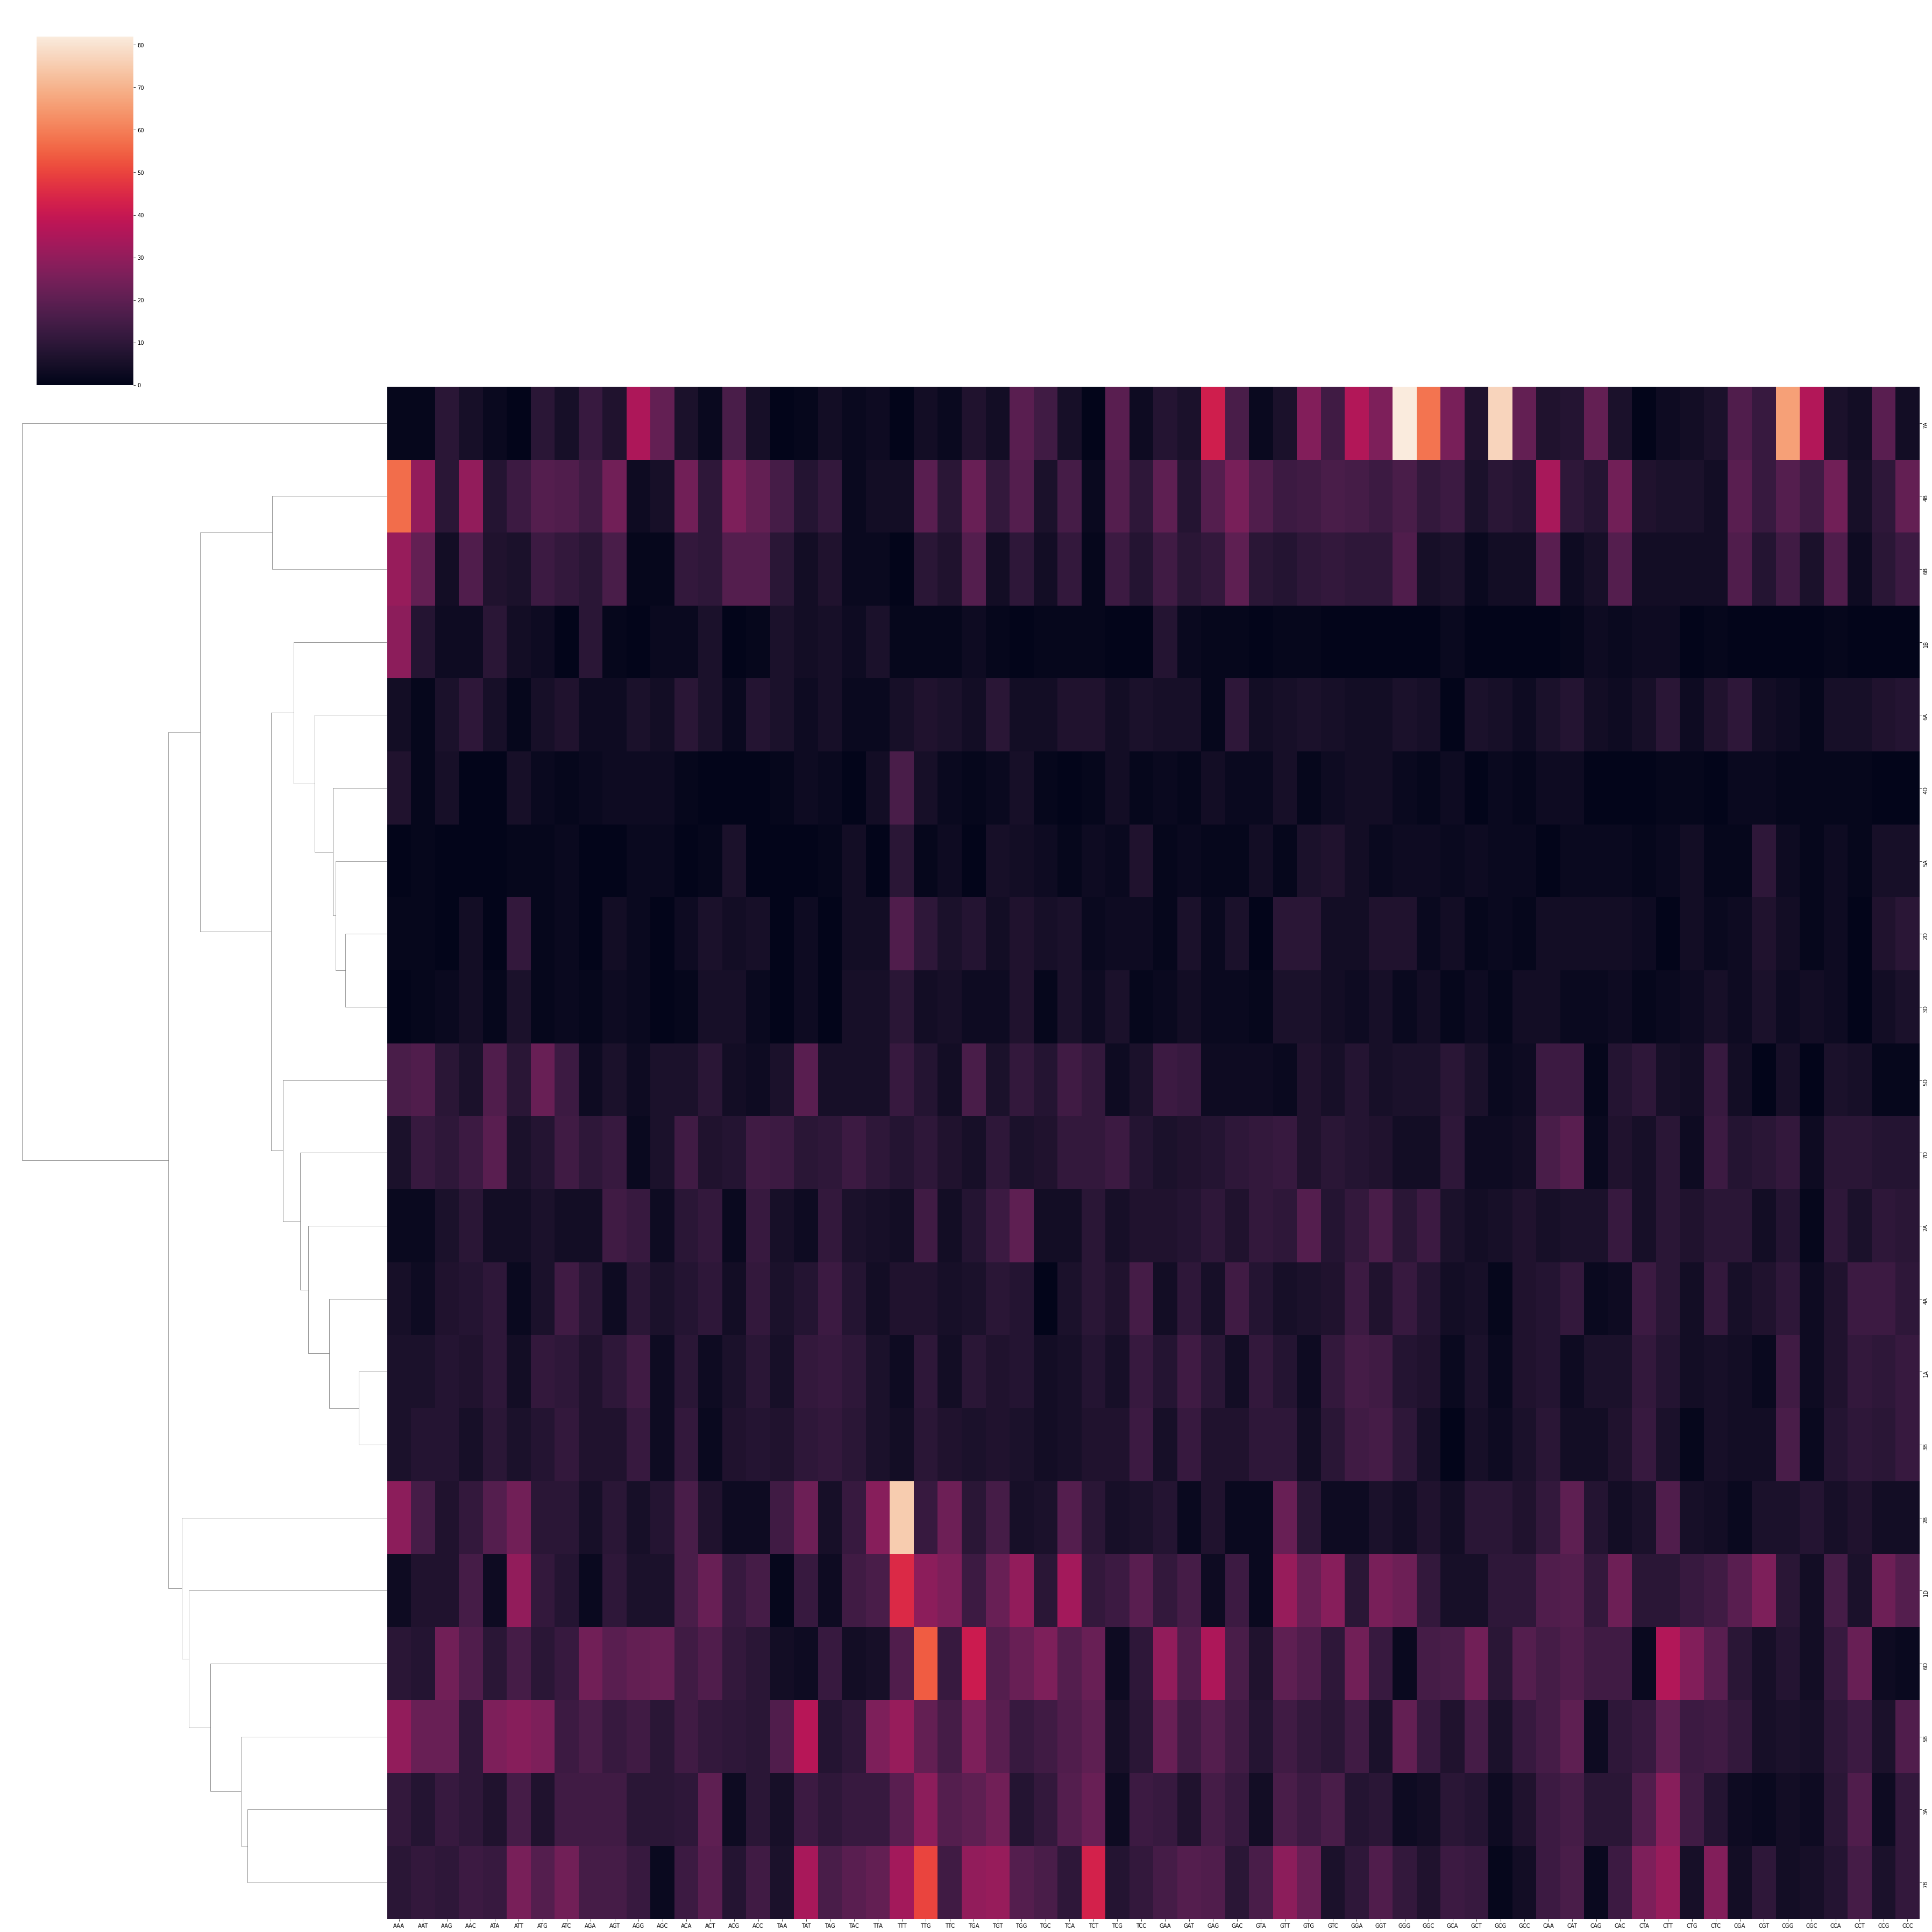

In [13]:
sns.clustermap(df.T, col_cluster=False, yticklabels=True, figsize=(50,50))
plt.savefig("./clustermap.png")

In [116]:
cluster = {"C1":[], "C2": [], "C3":[], "C4":[]}
for l, c in zip(dend["leaves"], dend["leaves_color_list"]):
    cluster[c].append(l)

In [121]:
sub1 = cluster["C2"]
sub2 = cluster["C1"] + cluster["C3"] + cluster["C4"]
def encoder(n):
    if n<10: return f"ctg0000{n}0"
    elif n<100: return f"ctg000{n}0"
    else: return f"ctg00{n}0"
sub1 = list(map(encoder, sub1))
sub2 = list(map(encoder, sub2))

In [122]:
from Bio import SeqIO
group1 = {}
group2 = {}
with open("./viola.unmasked.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        if record.id in sub1:
            group1[record.id] = str(record.seq)
        elif record.id in sub2:
            group2[record.id] = str(record.seq)

with open("./sub1.fasta", "w") as f1:
    for k, v in group1.items():
        f1.write(f">{k}\n")
        f1.write(f"{v}\n")

with open("./sub2.fasta", "w") as f2:
    for k, v in group2.items():
        f2.write(f">{k}\n")
        f2.write(f"{v}\n")

In [123]:
!cat sub1.fasta | grep ">" | wc -l

114


In [124]:
!cat sub2.fasta | grep ">" | wc -l

67
